In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
data=pd.read_csv("Height-Weight Data.csv - Height-Weight Data.csv.csv") #import dataset

In [5]:
data

Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
3496  69.296830  185.649086
3497  70.542201  210.198845
3498  73.912549  202.429960
3499  67.396021  144.277671
3500  72.738970  187.222909

[3501 rows x 2 columns]

In [6]:
data.head() # first 5 row in dataset

Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801

In [7]:
data.head(10)    # The head() function is used to get the first 9 rows

Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801
5  67.253016  152.212156
6  68.785081  183.927889
7  68.348516  167.971111
8  67.018950  175.929440
9  63.456494  156.399676

In [8]:
data.tail()  #The tail() function is used to get the last n rows

Height      Weight
3496  69.296830  185.649086
3497  70.542201  210.198845
3498  73.912549  202.429960
3499  67.396021  144.277671
3500  72.738970  187.222909

In [9]:
data.info()  #  information about a Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [10]:
data.shape  #Returns size of data which is equivalent to total number of elements. 3501 rows and 2 collumns

(3501, 2)

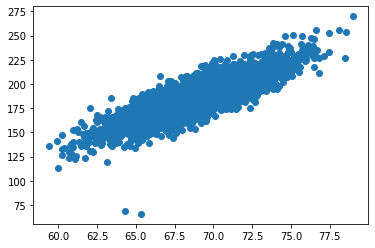

In [11]:
plt.scatter(data['Height'], data['Weight']) #A Scatter plot  data visualization technique that shows the relationship between two numerical variables.


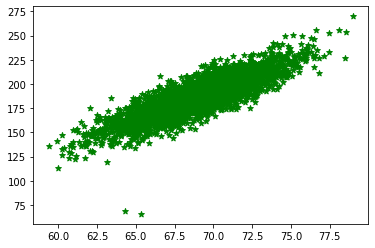

In [12]:
plt.scatter(data.Height, data.Weight,color='green',marker='*')

In [13]:
plt.scatter(data['Height'],data['Weight'],color='blue')

Text(0.5, 1.0, 'Height Weight plot')

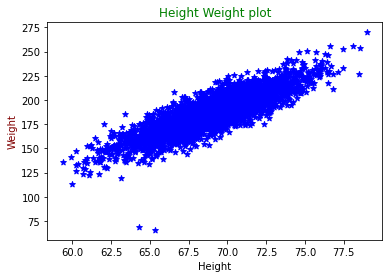

In [22]:
plt.scatter(data.Height, data.Weight, color='blue', marker='*')
plt.xlabel('Height',color='black')
plt.ylabel('Weight',color='#800000')
plt.title('Height Weight plot', color='green')

In [24]:
data.Height.mean() #Height columns mean value

69.02441087268781

In [25]:
data.Weight.mean()  # Weight columns mean value

186.891257979463

# Seperate dependent and independend variable

In [26]:
#x = df['area']
x = data[['Height']] # x = data.drop('weight', axis=1)

In [27]:
x.head() # feature data 

Height
0  73.847017
1  68.781904
2  74.110105
3  71.730978
4  69.881796

In [28]:
y = data['Weight']    # class data

In [29]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
3496    185.649086
3497    210.198845
3498    202.429960
3499    144.277671
3500    187.222909
Name: Weight, Length: 3501, dtype: float64

In [31]:
data.shape

(3501, 2)

# split the dataset

In [37]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30) # train_size=.70 # train = 70% # test = 30%

# Linear Regression

In [44]:
r = LinearRegression() #create a variable

In [45]:
r.fit(x_train, y_train)  #taining the model

LinearRegression()

In [48]:
r.predict([[73.847017]]) # x_train, y_train

C:\Users\proloy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215.6731237])

In [54]:
y_test.head() #Y_testing the value

1316    184.039981
2163    187.901375
181     210.871799
568     161.970938
1166    185.377673
Name: Weight, dtype: float64

In [55]:
ypred = r.predict(x_test)
ypred

array([186.94997673, 183.80045706, 189.9950892 , ..., 154.07018008,
       214.03606603, 185.90063731])

In [57]:
mse = mean_squared_error(y_test, ypred) #create variable mean square error

In [58]:
mse

106.85099682935449

In [60]:
mae = mean_absolute_error(y_test, ypred) #create variable mean absolute error

In [61]:
mae

8.257062793254212

In [62]:
m = r.coef_  # create cofficient 

In [64]:
m #find cofficient value

array([5.98049248])

In [65]:
c= r.intercept_  #constant value c 

In [66]:
c

-225.96840625092327

In [68]:
# y = (m * x)+c
result = m*73.847017+c
result

array([215.6731237])

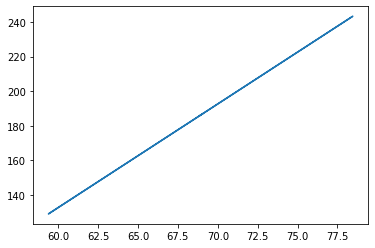

In [72]:
pred = r.predict(x_test)
#Best fit line
plt.plot(np.squeeze(x_test), pred)

In [75]:
#Best fit line
plt.plot(data.Height , r.predict(data[['Height']]))

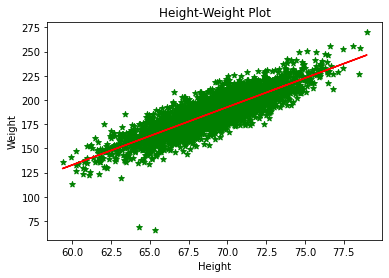

In [76]:
plt.scatter(data.Height, data.Weight, color='green', marker='*')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Plot')
plt.plot(data.Height , r.predict(data[['Height']]), color='red') # best fit line in this model

In [77]:
r.score(x_test, y_test) # testing accuracy

0.7266568068681565

In [80]:
r.score(x_train, y_train) # training accuracy

0.7346865195501502